## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-1162196871.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 407k/407k [00:00<00:00, 2.93MB/s]


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

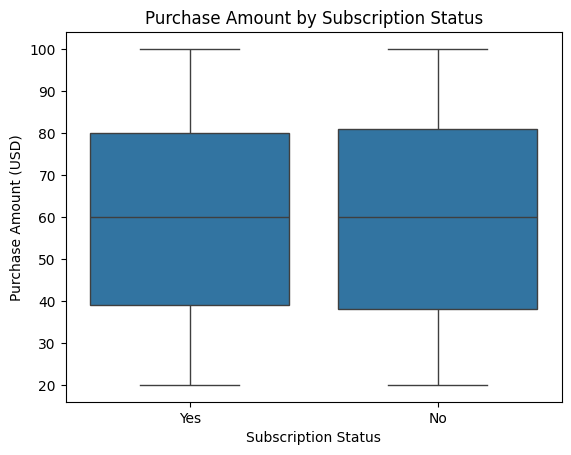

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.boxplot(
    x="Subscription Status",
    y="Purchase Amount (USD)",
    data=df
)

plt.title("Purchase Amount by Subscription Status")
plt.xlabel("Subscription Status")
plt.ylabel("Purchase Amount (USD)")
plt.show()

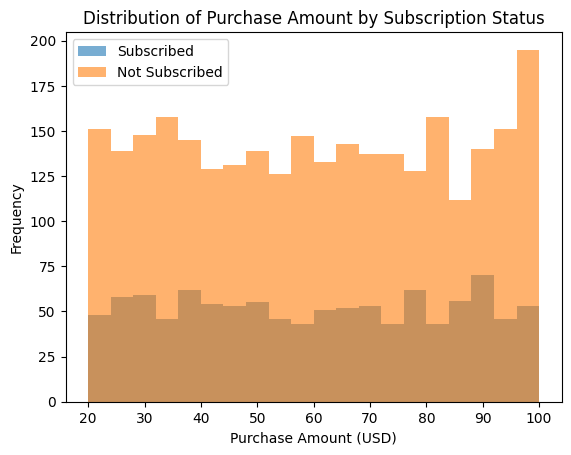

In [ ]:
subscribed = df[df["Subscription Status"] == "Yes"]["Purchase Amount (USD)"]
not_subscribed = df[df["Subscription Status"] == "No"]["Purchase Amount (USD)"]

plt.figure()
plt.hist(subscribed, bins=20, alpha=0.6, label="Subscribed")
plt.hist(not_subscribed, bins=20, alpha=0.6, label="Not Subscribed")

plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Purchase Amount by Subscription Status")
plt.legend()
plt.show()

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

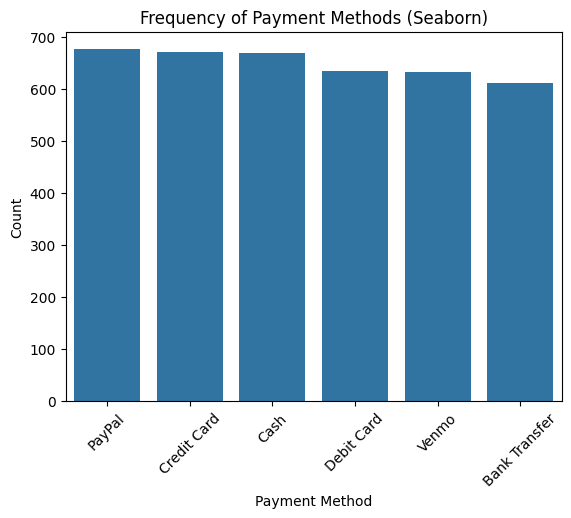

In [ ]:
payment_counts = df["Payment Method"].value_counts()
plt.figure()
sns.countplot(
    data=df,
    x="Payment Method",
    order=payment_counts.index
)

plt.title("Frequency of Payment Methods (Seaborn)")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

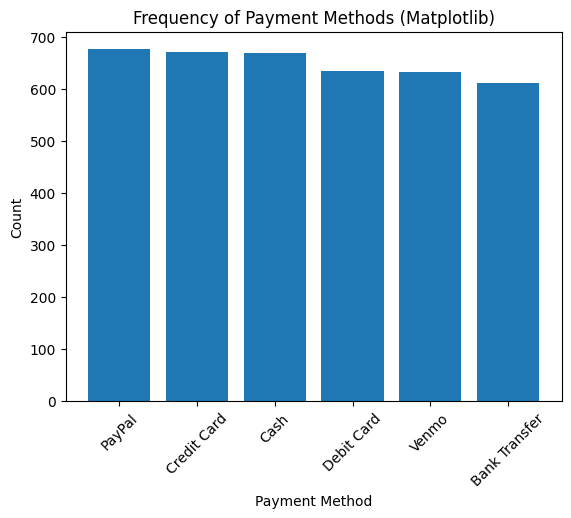

In [ ]:
plt.figure()
plt.bar(payment_counts.index, payment_counts.values)

plt.title("Frequency of Payment Methods (Matplotlib)")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

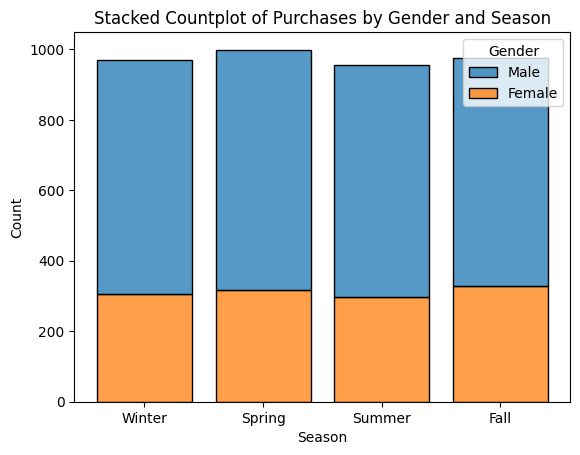

In [ ]:
plt.figure()
sns.histplot(
    data=df,
    x="Season",
    hue="Gender",
    multiple="stack",
    shrink=0.8
)

plt.title("Stacked Countplot of Purchases by Gender and Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

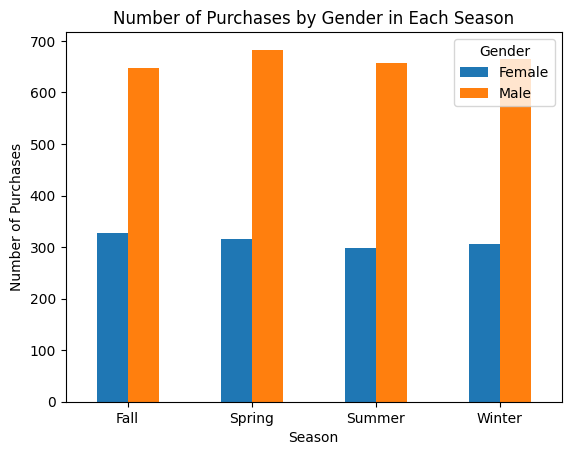

In [ ]:
counts.plot(kind="bar")

plt.title("Number of Purchases by Gender in Each Season")
plt.xlabel("Season")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.show()

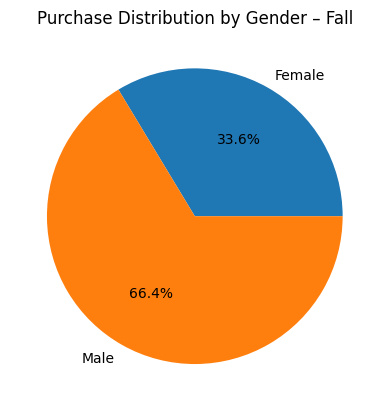

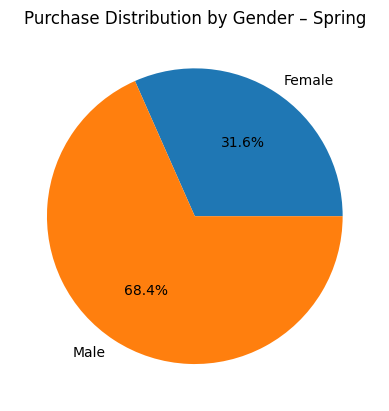

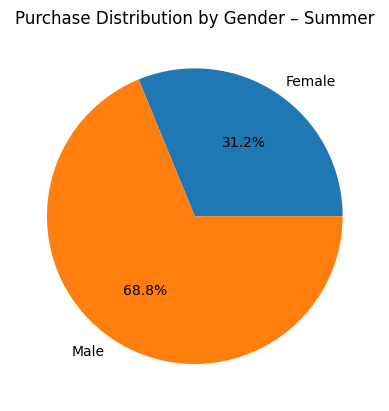

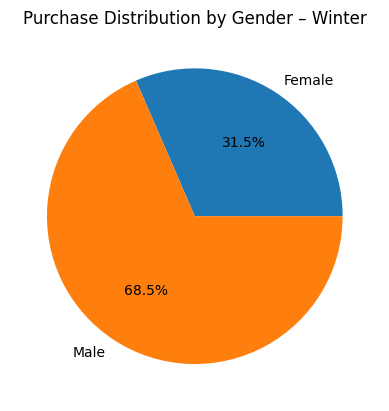

In [ ]:
counts = pd.crosstab(df["Season"], df["Gender"])

for season in counts.index:
    plt.figure()
    counts.loc[season].plot(kind="pie", autopct="%1.1f%%")
    plt.title(f"Purchase Distribution by Gender – {season}")
    plt.ylabel("")
    plt.show()

### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

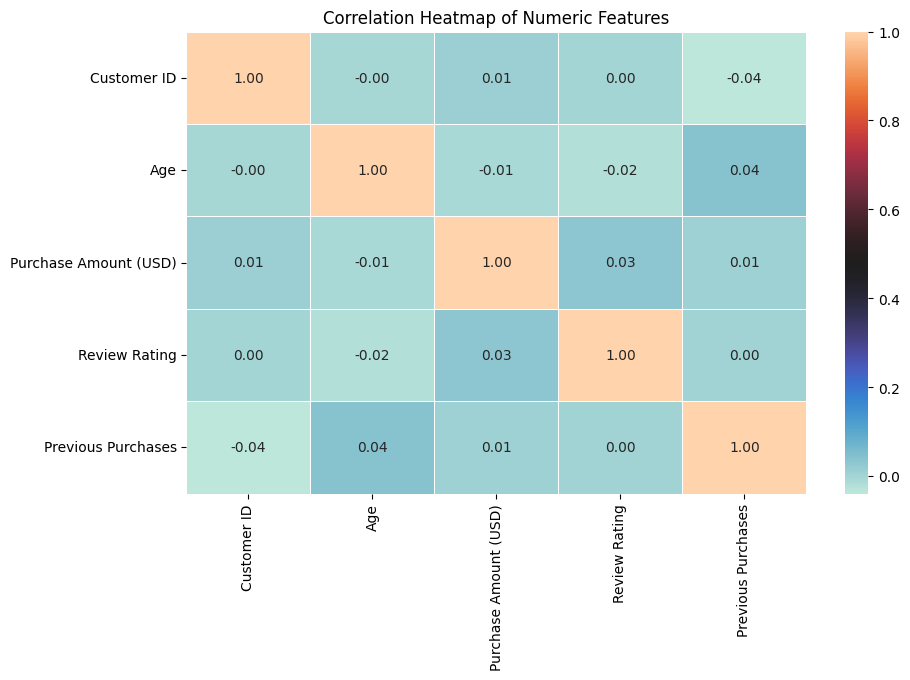

In [ ]:
numeric_df = df.select_dtypes(include="number")

corr = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap="icefire",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

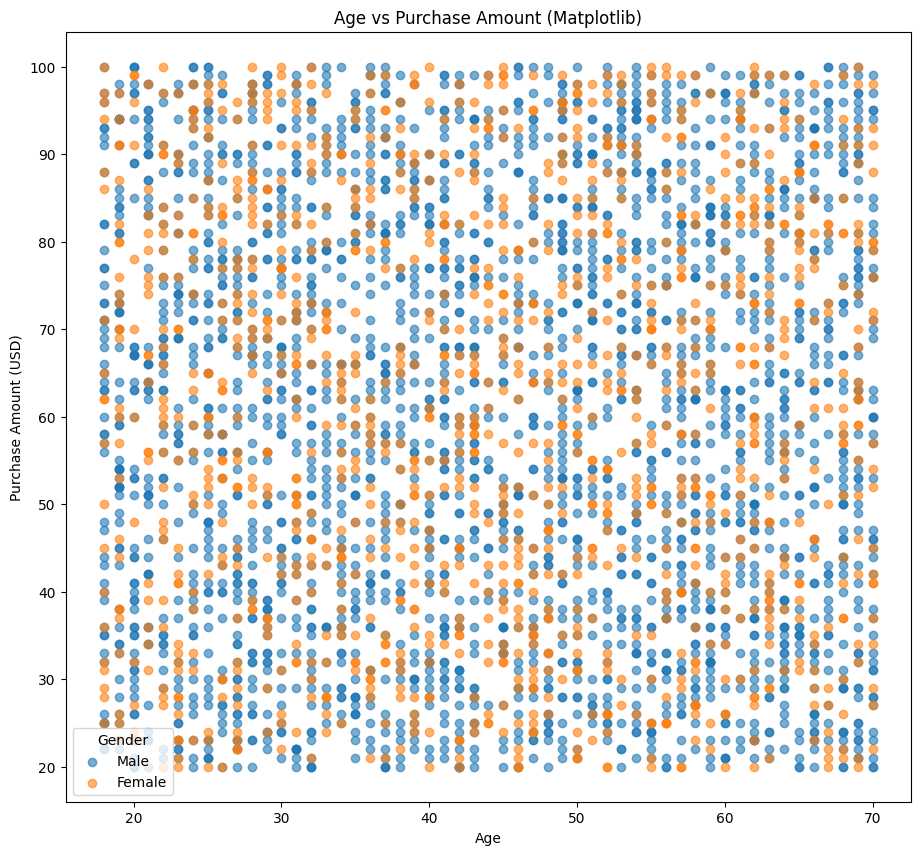

In [ ]:
plt.figure(figsize=(24, 10))

plt.subplot(1, 2, 1)

for gender in df["Gender"].unique():
    subset = df[df["Gender"] == gender]
    plt.scatter(
        subset["Age"],
        subset["Purchase Amount (USD)"],
        label=gender,
        alpha=0.6
    )

plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.title("Age vs Purchase Amount (Matplotlib)")
plt.legend(title="Gender")

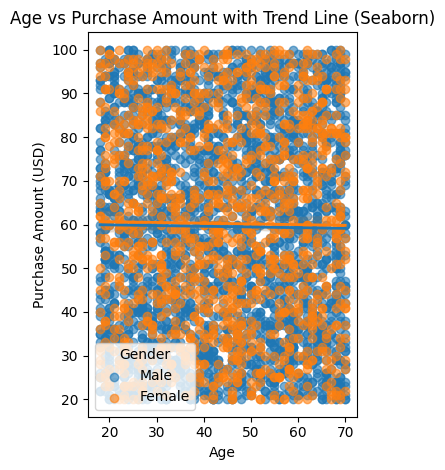

In [ ]:
plt.subplot(1, 2, 2)

for gender in df["Gender"].unique():
    sns.regplot(
        data=df[df["Gender"] == gender],
        x="Age",
        y="Purchase Amount (USD)",
        scatter=True,
        label=gender,
        scatter_kws={"alpha": 0.6},
        line_kws={"linewidth": 2}
    )

plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.title("Age vs Purchase Amount with Trend Line (Seaborn)")
plt.legend(title="Gender")

plt.tight_layout()
plt.show()

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

In [ ]:
pivot_table = pd.pivot_table(
    df,
    values="Review Rating",
    index="Category",
    columns="Size",
    aggfunc="mean"
)

print(pivot_table)

Size                L         M         S        XL
Category                                           
Accessories  3.736808  3.766192  3.785652  3.819858
Clothing     3.747193  3.692159  3.762676  3.729897
Footwear     3.797093  3.711236  3.865591  3.986567
Outerwear    3.751613  3.693243  3.858929  3.792593


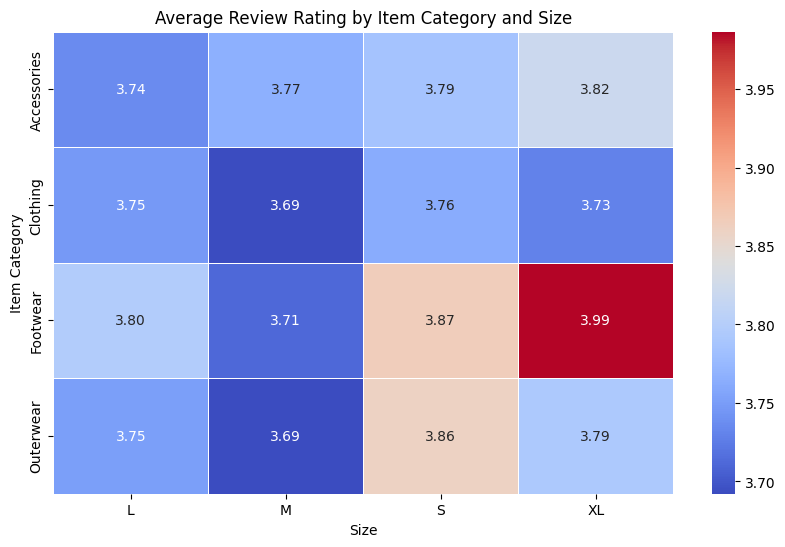

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Average Review Rating by Item Category and Size")
plt.xlabel("Size")
plt.ylabel("Item Category")
plt.show()

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

In [ ]:
avg_purchase = pd.pivot_table(
    df,
    values="Purchase Amount (USD)",
    index="Season",
    columns="Shipping Type",
    aggfunc="mean"
)

print(avg_purchase)

Shipping Type  2-Day Shipping    Express  Free Shipping  Next Day Air  \
Season                                                                  
Fall                61.928571  63.159763      60.660714     59.771930   
Spring              58.157303  57.739884      61.682927     58.453333   
Summer              60.089655  58.337931      60.474860     58.238411   
Winter              63.186667  62.547170      58.810976     58.011364   

Shipping Type   Standard  Store Pickup  
Season                                  
Fall           61.380952     62.641379  
Spring         56.522293     59.774011  
Summer         56.903614     56.449704  
Winter         58.901840     61.182390  


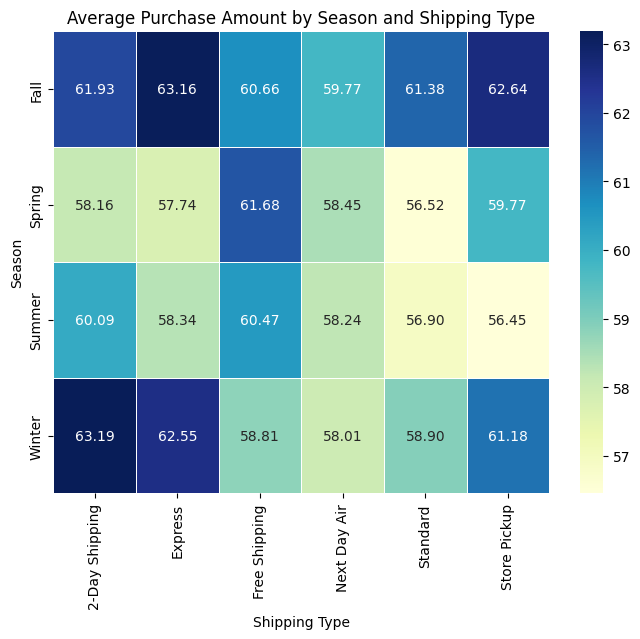

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(
    avg_purchase,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5
)

plt.title("Average Purchase Amount by Season and Shipping Type")
plt.xlabel("Shipping Type")
plt.ylabel("Season")
plt.show()

### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

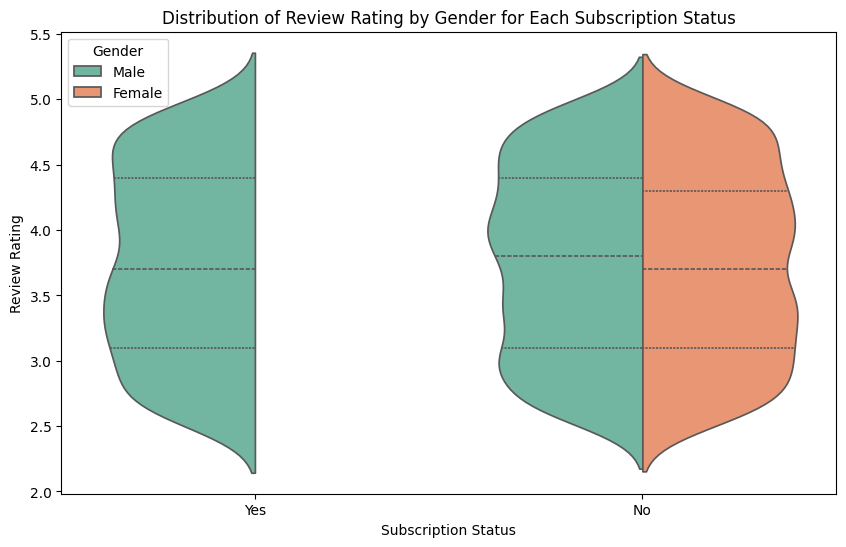

In [ ]:
plt.figure(figsize=(10,6))

sns.violinplot(
    data=df,
    x="Subscription Status",
    y="Review Rating",
    hue="Gender",
    split=True,
    inner="quartile",
    palette="Set2"
)

plt.title("Distribution of Review Rating by Gender for Each Subscription Status")
plt.xlabel("Subscription Status")
plt.ylabel("Review Rating")
plt.legend(title="Gender")
plt.show()

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

In [ ]:
total_purchase = df.groupby("Item Purchased")["Purchase Amount (USD)"].sum()

top5_items = total_purchase.sort_values(ascending=False).head(5)
print(top5_items)

Item Purchased
Blouse     10410
Shirt      10332
Dress      10320
Pants      10090
Jewelry    10010
Name: Purchase Amount (USD), dtype: int64


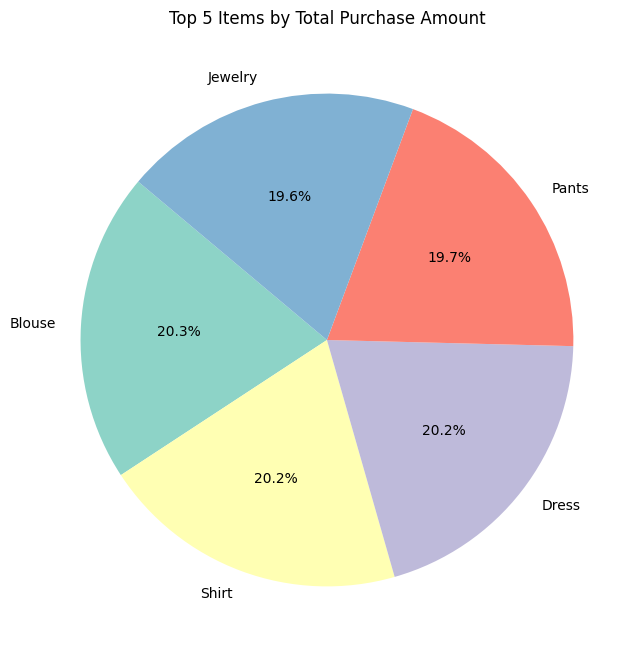

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(
    top5_items,
    labels=top5_items.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title("Top 5 Items by Total Purchase Amount")
plt.show()

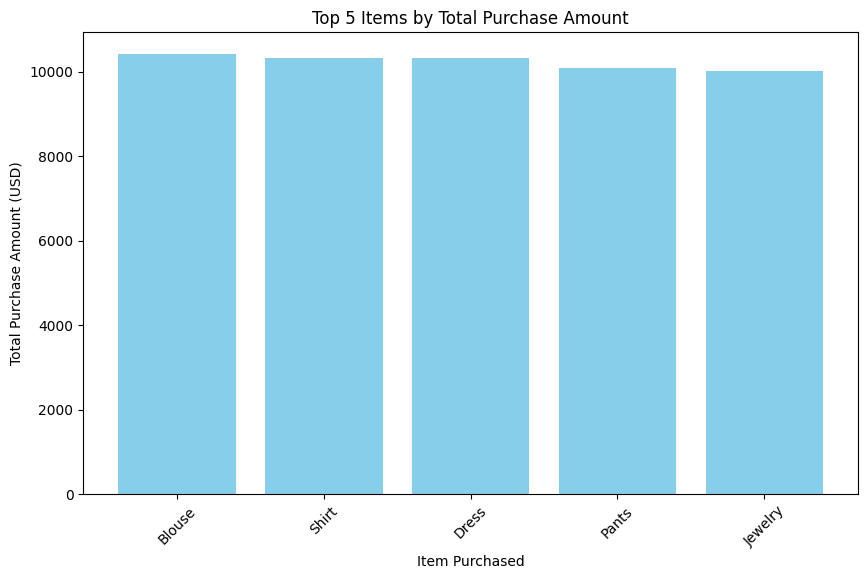

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(top5_items.index, top5_items.values, color="skyblue")
plt.xlabel("Item Purchased")
plt.ylabel("Total Purchase Amount (USD)")
plt.title("Top 5 Items by Total Purchase Amount")
plt.xticks(rotation=45)
plt.show()

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

In [ ]:
avg_purchase_by_location = df.groupby("Location")["Purchase Amount (USD)"].mean()

top5_locations = avg_purchase_by_location.sort_values(ascending=False).head(5).index

top5_df = df[df["Location"].isin(top5_locations)]

print(top5_df[["Location", "Purchase Amount (USD)", "Previous Purchases"]].head())

         Location  Purchase Amount (USD)  Previous Purchases
8   West Virginia                     97                   8
26         Nevada                     20                  13
31  West Virginia                     79                  45
39        Arizona                     60                  18
41         Alaska                     39                  40


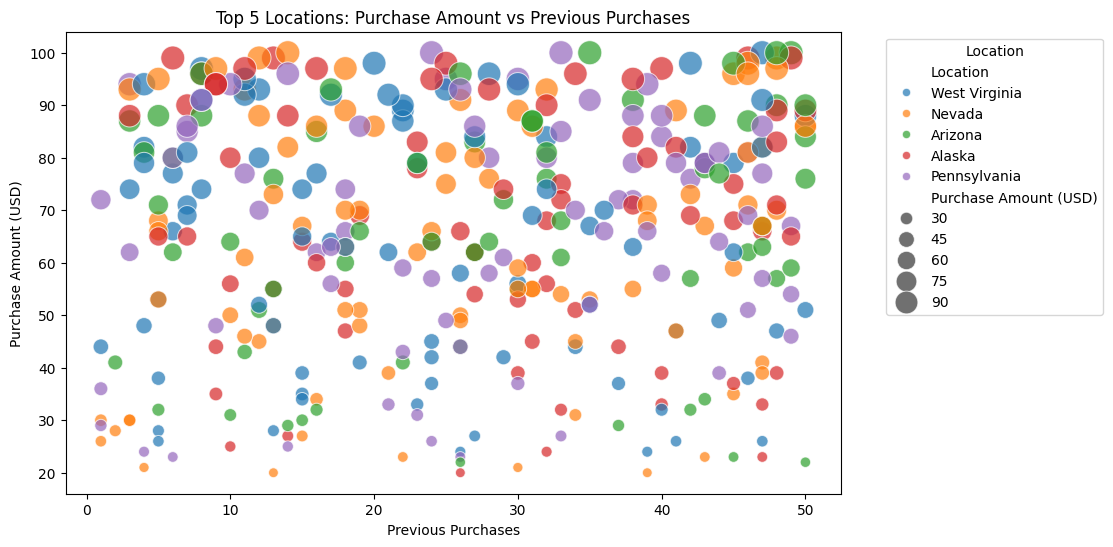

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=top5_df,
    x="Previous Purchases",
    y="Purchase Amount (USD)",
    hue="Location",
    size="Purchase Amount (USD)",
    sizes=(50, 300),
    alpha=0.7
)

plt.title("Top 5 Locations: Purchase Amount vs Previous Purchases")
plt.xlabel("Previous Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

In [ ]:
gender_size_ct = pd.crosstab(df["Gender"], df["Size"])
print(gender_size_ct)

Size      L     M    S   XL
Gender                     
Female  337   590  187  134
Male    716  1165  476  295


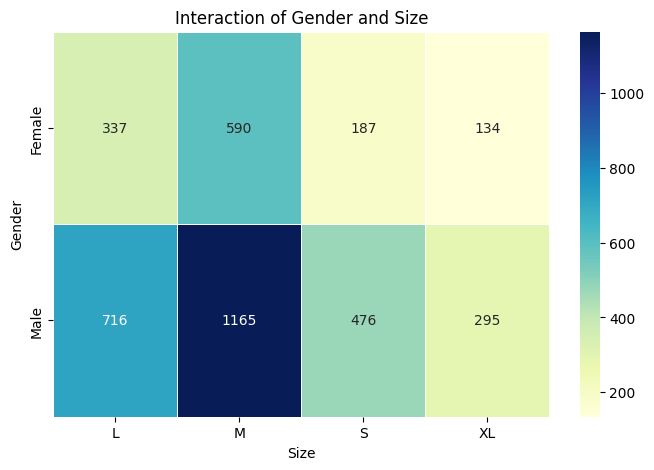

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(
    gender_size_ct,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    linewidths=0.5
)

plt.title("Interaction of Gender and Size")
plt.xlabel("Size")
plt.ylabel("Gender")
plt.show()

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

In [ ]:
promo_freq_ct = pd.crosstab(df["Frequency of Purchases"], df["Promo Code Used"])
print(promo_freq_ct)

Promo Code Used          No  Yes
Frequency of Purchases          
Annually                334  238
Bi-Weekly               321  226
Every 3 Months          326  258
Fortnightly             299  243
Monthly                 316  237
Quarterly               322  241
Weekly                  305  234


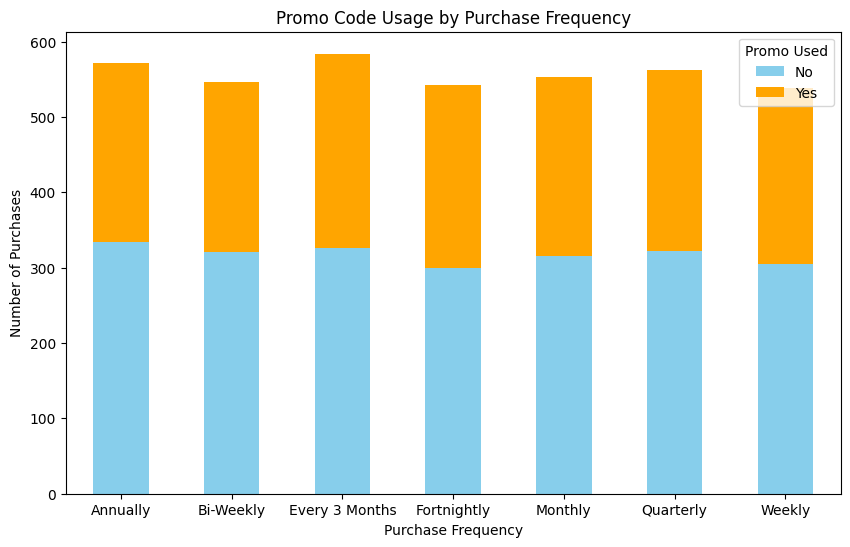

In [ ]:
promo_freq_ct.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    color=["skyblue", "orange"]
)

plt.title("Promo Code Usage by Purchase Frequency")
plt.xlabel("Purchase Frequency")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=0)
plt.legend(title="Promo Used")
plt.show()

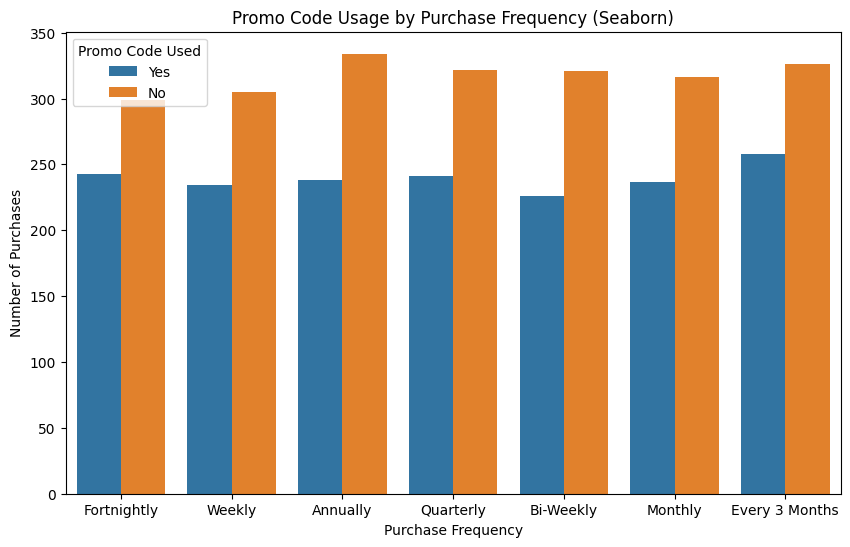

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(
    data=df,
    x="Frequency of Purchases",
    hue="Promo Code Used"
)

plt.title("Promo Code Usage by Purchase Frequency (Seaborn)")
plt.xlabel("Purchase Frequency")
plt.ylabel("Number of Purchases")
plt.show()

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

In [ ]:
numeric_cols = df.select_dtypes(include="number").columns.tolist()
plot_cols = numeric_cols + ["Gender"]
pairplot_df = df[plot_cols]

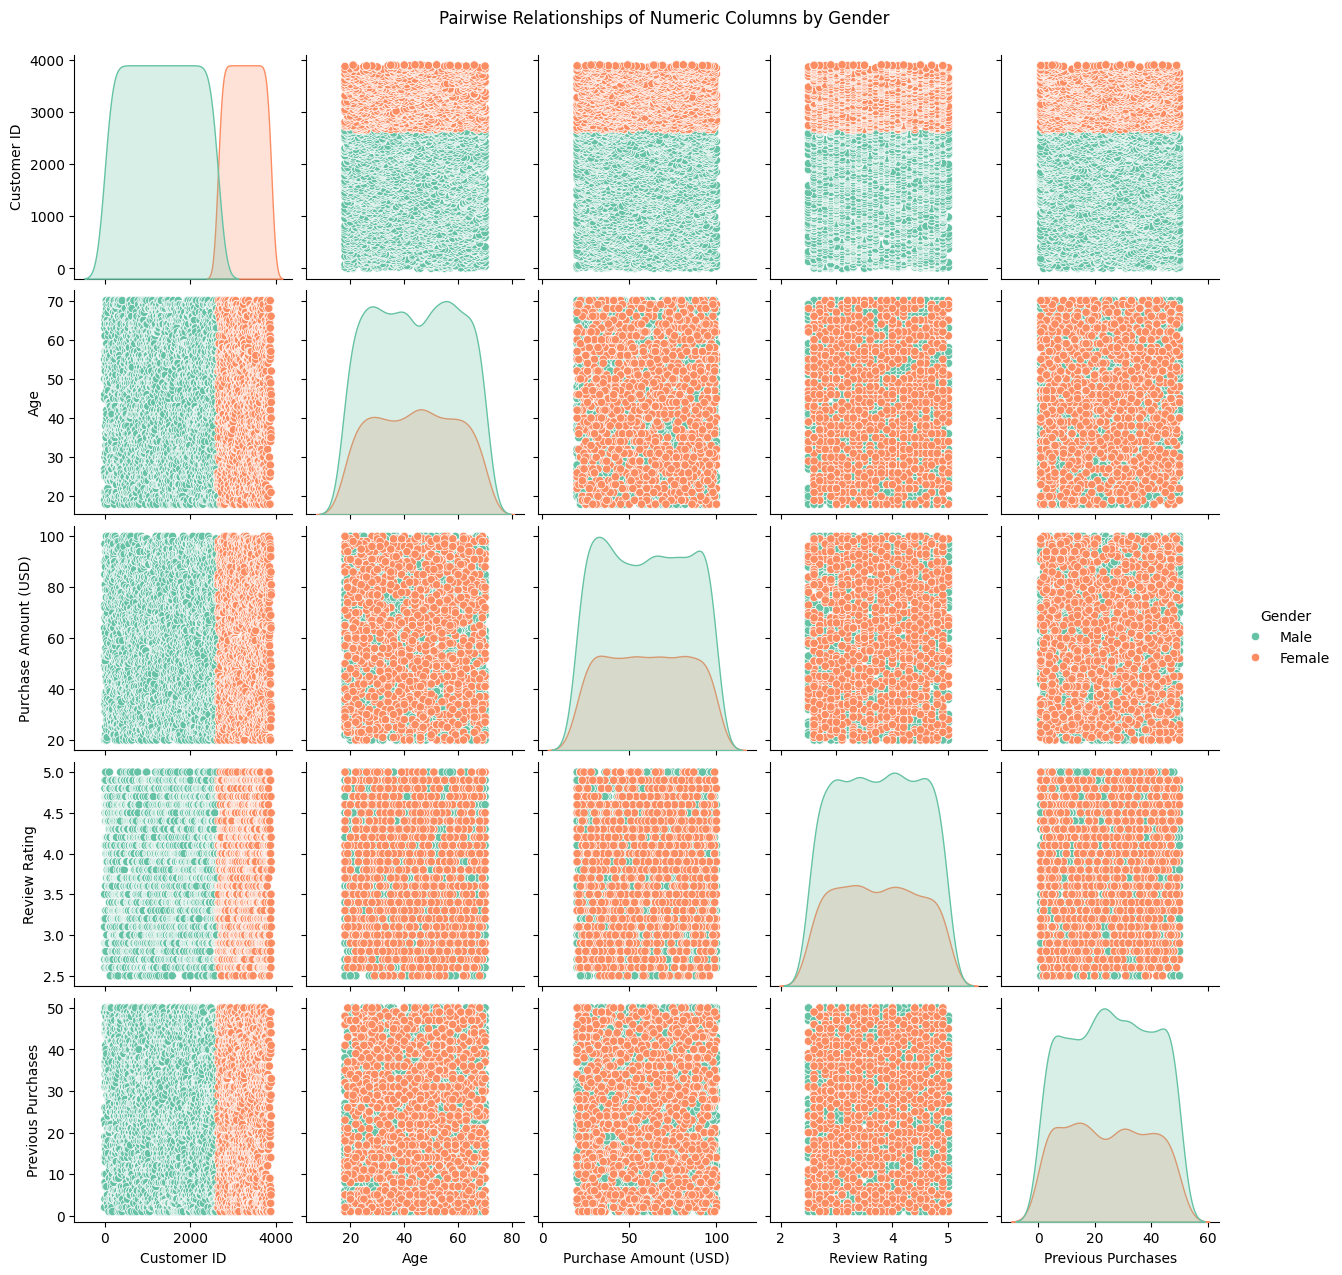

In [ ]:
sns.pairplot(
    data=pairplot_df,
    hue="Gender",
    diag_kind="kde",
    palette="Set2",
    corner=False
)

plt.suptitle("Pairwise Relationships of Numeric Columns by Gender", y=1.02)
plt.show()